<a href="https://colab.research.google.com/github/waheedweins/Deeep-Learning-Projects/blob/main/cnn_happy_sad_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game Plan

1.   Building a Data Pipeline
2.   Preprocessing Images for DL

1.   Creating a DL_NN Classifier
2.   Evaluating Model Performance

1.   Saving the Model for Deployment








## **Importing Libraries**

In [81]:
# importing important libraries
import numpy as np
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt


In [82]:
os.listdir(os.path.join(data_dir,'happy'))

['getty_478389113_970647970450091_99776.jpg',
 'group-happy-people-showing-thumb-up-sign-over-white-background-51564090.jpg',
 'group-happy-people-party-isolated-white-background-31666248.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'group-young-happy-people-with-their-hands-up_369728-62.jpg',
 '360_F_261529596_YZWJaMnYFSCM0FSCrxs71o6RrZ9MpP4D.jpg',
 'sunset-570881_1280.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 'Happy-Guy.jpg',
 'hand-drawn-happy-people-jumping_23-2149092878.jpg',
 '05-12-21-happy-people.jpg',
 'A_Sep20_14_1189155141.jpg',
 's-looking-pleased-like-something-standing-against-blue-background_1258-65055.jpg']

## **Remove dodgy iages**



In [83]:
import os

data_dir = '/content/sample_data/data'
image_exts = ['jpg', 'jpeg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
  # Use os.scandir to iterate over entries (including hidden files)
  for entry in os.scandir(os.path.join(data_dir, image_class)):
    # Check if it's a file and not a directory (using is_file())
    if entry.is_file():
      image_path = entry.path  # Get the full path from the entry
      try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          os.remove(image_path)
          print(f'image path : {image_path} not found in exts list')
      except Exception as e:
        print(f"issue with image path {image_path}")


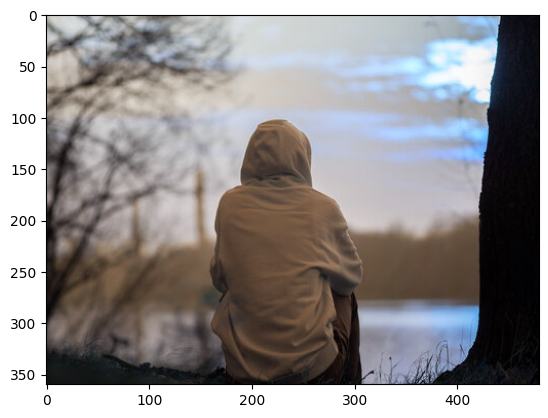

In [84]:
img = cv2.imread(image_path)
plt.imshow(img)
plt.show()

In [85]:
img.shape

(360, 480, 3)

##**Load Data Set**

In [86]:
import matplotlib.pyplot as plt
import numpy as np

In [91]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()

Found 48 files belonging to 2 classes.


In [93]:
data_iterator

In [94]:
batch = data_iterator.next()

In [97]:
batch[1]

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

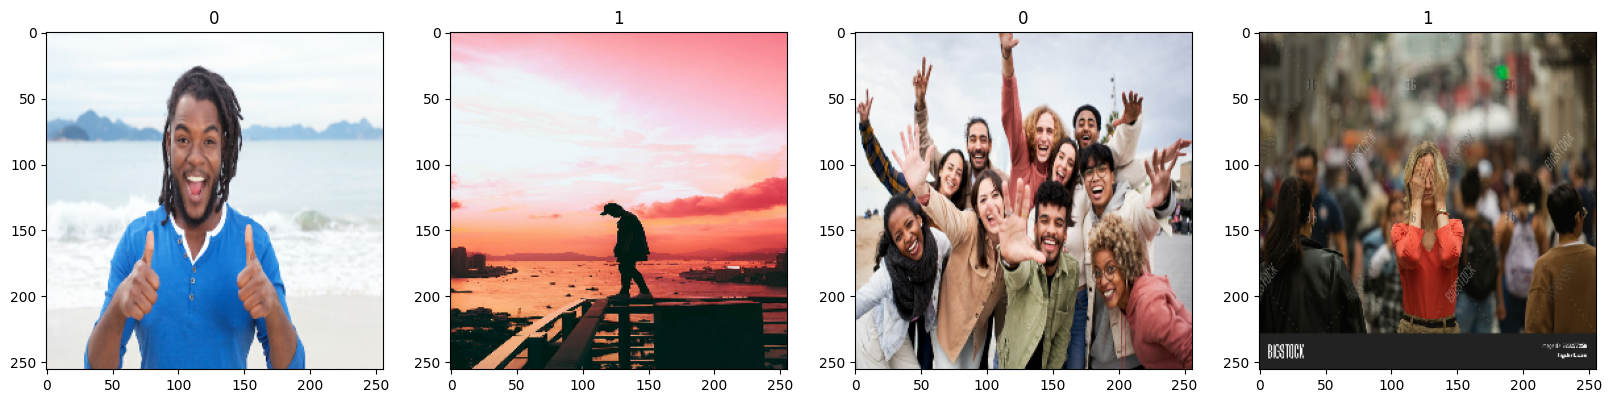

In [106]:
fig, ax = plt.subplots(figsize = (20,20), ncols = 4)
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


In [103]:
list = [4,4,5,6,7]
for a,b in enumerate(list):
  print(a,b)

0 4
1 4
2 5
3 6
4 7
